In [1]:
import numpy as np
import netCDF4 as nc
import f90nml
import os
from salishsea_tools import bio_tools as bio
from salishsea_tools import viz_tools, visualisations
import matplotlib.pyplot as plt
import cmocean
import matplotlib as mpl
%matplotlib inline

In [2]:
def load_nml_bio(resDir,nmlname,bioRefName='namelist_lox_ref',bioCfgName='namelist_lox_cfg',namRefDir=None):
    """ extract parameter values from lox namelists for nampisbio
    :arg str resDir: directory containing namelists associated with run; usually results diri
    :arg str nmlname name of namelist to load: eg, 'nampisprod'
    :arg str bioRefName: name of bio reference namelist (optional)
    :arg str bioCfgName: name of bio config namelist (optional)
    :arg str namRefDir: dir to get ref namelist from if not in results dir (optional)
    """
    if namRefDir==None:
        namRefDir=resDir
    nmlRef=f90nml.read(os.path.join(namRefDir,bioRefName))
    nmlCfg=f90nml.read(os.path.join(resDir,bioCfgName))
    nml=nmlRef[nmlname]
    for key in nmlCfg[nmlname]:
        nml[key]=nmlCfg[nmlname][key]
    return nml

In [3]:
nml=bio.load_nml_bio(resDir='/ocean/eolson/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SalishSeaCast/EXP00/',
                 nmlname='nampisprod',bioRefName='namelist_smelt_cfg_HC201905equiv',bioCfgName='namelist_smelt_cfg_HC201905equiv')

In [4]:
def phyto_Tdep_Factor(TT, zz_rate_maxtemp, zz_rate_temprange):
    
    return np.exp(0.07 * (TT - 20)) * np.minimum(np.maximum((zz_rate_maxtemp - TT), 0.0),zz_rate_temprange) / (zz_rate_temprange + 1e-10)

In [5]:
def calc_T_Factors(TT,nampisprod):
    Tdep_Diat=phyto_Tdep_Factor(TT,nampisprod['zz_rate_maxtemp_diat'],nampisprod['zz_rate_temprange_diat'])
    Tdep_Myri=phyto_Tdep_Factor(TT,nampisprod['zz_rate_maxtemp_myri'],nampisprod['zz_rate_temprange_myri'])
    Tdep_Nano=phyto_Tdep_Factor(TT,nampisprod['zz_rate_maxtemp_nano'],nampisprod['zz_rate_temprange_nano'])
    return Tdep_Diat, Tdep_Myri, Tdep_Nano

In [6]:
TF_diat,TF_meso,TF_flag=calc_T_Factors(20,nml)

In [7]:
TF_diat

0.42857142856836733

In [8]:
# load necessary files
resDir='/results2/SalishSea/month-avg.201905/'
namDir='/results2/SalishSea/nowcast-green.201905/01jan15/'
nampisprod=bio.load_nml_bio(namDir,'nampisprod')


## Add April from all years so that you can calculate a climatology

dia2007=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20070401_20070430.nc'))
ptc2007=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20070401_20070430.nc'))
grd2007=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20070401_20070430.nc'))

dia2008=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20080401_20080430.nc'))
ptc2008=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20080401_20080430.nc'))
grd2008=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20080401_20080430.nc'))

dia2009=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20090401_20090430.nc'))
ptc2009=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20090401_20090430.nc'))
grd2009=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20090401_20090430.nc'))

dia2010=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20100401_20100430.nc'))
ptc2010=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20100401_20100430.nc'))
grd2010=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20100401_20100430.nc'))

dia2011=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20110401_20110430.nc'))
ptc2011=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20110401_20110430.nc'))
grd2011=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20110401_20110430.nc'))

dia2012=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20120401_20120430.nc'))
ptc2012=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20120401_20120430.nc'))
grd2012=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20120401_20120430.nc'))

dia2013=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20130401_20130430.nc'))
ptc2013=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20130401_20130430.nc'))
grd2013=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20130401_20130430.nc'))

dia2014=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20140401_20140430.nc'))
ptc2014=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20140401_20140430.nc'))
grd2014=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20140401_20140430.nc'))

dia2015=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20150401_20150430.nc'))
ptc2015=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20150401_20150430.nc'))
grd2015=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20150401_20150430.nc'))

dia2016=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20160401_20160430.nc'))
ptc2016=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20160401_20160430.nc'))
grd2016=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20160401_20160430.nc'))

dia2017=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20170401_20170430.nc'))
ptc2017=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20170401_20170430.nc'))
grd2017=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20170401_20170430.nc'))

dia2018=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20180401_20180430.nc'))
ptc2018=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20180401_20180430.nc'))
grd2018=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20180401_20180430.nc'))

dia2019=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20190401_20190430.nc'))
ptc2019=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20190401_20190430.nc'))
grd2019=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20190401_20190430.nc'))

dia2020=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_carp_T_20200401_20200430.nc'))
ptc2020=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_ptrc_T_20200401_20200430.nc'))
grd2020=nc.Dataset(os.path.join(resDir,'SalishSeaCast_1m_grid_T_20200401_20200430.nc'))


m=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
m=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')

m=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
tmask=m.variables['tmask'][:,:,:,:]
tmask=np.copy(m.variables['tmask'])
navlon=np.copy(m.variables['nav_lon'])
navlat=np.copy(m.variables['nav_lat'])
m.close()
fb=nc.Dataset('/data/eolson/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fm=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')

In [9]:
I_clim=(dia2008.variables['PAR'][0,:,:,:]+dia2009.variables['PAR'][0,:,:,:]+dia2010.variables['PAR'][0,:,:,:]+\
        dia2011.variables['PAR'][0,:,:,:]+dia2012.variables['PAR'][0,:,:,:]+dia2013.variables['PAR'][0,:,:,:]+\
       dia2014.variables['PAR'][0,:,:,:]+dia2015.variables['PAR'][0,:,:,:]++dia2016.variables['PAR'][0,:,:,:]+\
       dia2017.variables['PAR'][0,:,:,:]+dia2018.variables['PAR'][0,:,:,:]+dia2019.variables['PAR'][0,:,:,:]+\
       dia2020.variables['PAR'][0,:,:,:])/14

In [10]:
NO_clim=(ptc2008.variables['nitrate'][0,:,:,:]+ptc2009.variables['nitrate'][0,:,:,:]+ptc2010.variables['nitrate'][0,:,:,:]+\
        ptc2011.variables['nitrate'][0,:,:,:]+ptc2012.variables['nitrate'][0,:,:,:]+ptc2013.variables['nitrate'][0,:,:,:]+\
       ptc2014.variables['nitrate'][0,:,:,:]+ptc2015.variables['nitrate'][0,:,:,:]+ptc2016.variables['nitrate'][0,:,:,:]+\
       ptc2017.variables['nitrate'][0,:,:,:]+ptc2018.variables['nitrate'][0,:,:,:]+ptc2019.variables['nitrate'][0,:,:,:]+\
       ptc2020.variables['nitrate'][0,:,:,:])/14

In [11]:
NH_clim=(ptc2008.variables['ammonium'][0,:,:,:]+ptc2009.variables['ammonium'][0,:,:,:]+ptc2010.variables['ammonium'][0,:,:,:]+\
        ptc2011.variables['ammonium'][0,:,:,:]+ptc2012.variables['ammonium'][0,:,:,:]+ptc2013.variables['ammonium'][0,:,:,:]+\
       ptc2014.variables['ammonium'][0,:,:,:]+ptc2015.variables['ammonium'][0,:,:,:]+ptc2016.variables['ammonium'][0,:,:,:]+\
       ptc2017.variables['ammonium'][0,:,:,:]+ptc2018.variables['ammonium'][0,:,:,:]+ptc2019.variables['ammonium'][0,:,:,:]+\
       ptc2020.variables['ammonium'][0,:,:,:])/14

In [12]:
Si_clim=(ptc2008.variables['silicon'][0,:,:,:]+ptc2009.variables['silicon'][0,:,:,:]+ptc2010.variables['silicon'][0,:,:,:]+\
        ptc2011.variables['silicon'][0,:,:,:]+ptc2012.variables['silicon'][0,:,:,:]+ptc2013.variables['silicon'][0,:,:,:]+\
       ptc2014.variables['silicon'][0,:,:,:]+ptc2015.variables['silicon'][0,:,:,:]+ptc2016.variables['silicon'][0,:,:,:]+\
       ptc2017.variables['silicon'][0,:,:,:]+ptc2018.variables['silicon'][0,:,:,:]+ptc2019.variables['silicon'][0,:,:,:]+\
       ptc2020.variables['silicon'][0,:,:,:])/14

In [13]:
T_clim=(grd2008.variables['votemper'][0,:,:,:]+grd2009.variables['votemper'][0,:,:,:]+grd2010.variables['votemper'][0,:,:,:]+\
        grd2011.variables['votemper'][0,:,:,:]+grd2012.variables['votemper'][0,:,:,:]+grd2013.variables['votemper'][0,:,:,:]+\
       grd2014.variables['votemper'][0,:,:,:]+grd2015.variables['votemper'][0,:,:,:]+grd2016.variables['votemper'][0,:,:,:]+\
       grd2017.variables['votemper'][0,:,:,:]+grd2018.variables['votemper'][0,:,:,:]+grd2019.variables['votemper'][0,:,:,:]+\
       grd2020.variables['votemper'][0,:,:,:])/14

In [14]:
# times 9, 19 are around noon local time
I_cold=(dia2008.variables['PAR'][0,:,:,:]+dia2010.variables['PAR'][0,:,:,:]+dia2011.variables['PAR'][0,:,:,:]+dia2012.variables['PAR'][0,:,:,:])/4
NO_cold=(ptc2008.variables['nitrate'][0,:,:,:]+ptc2010.variables['nitrate'][0,:,:,:]+ptc2011.variables['nitrate'][0,:,:,:]+ptc2012.variables['nitrate'][0,:,:,:])/4
NH_cold=(ptc2008.variables['ammonium'][0,:,:,:]+ptc2010.variables['ammonium'][0,:,:,:]+ptc2011.variables['ammonium'][0,:,:,:]+ptc2012.variables['ammonium'][0,:,:,:])/4
Si_cold=(ptc2008.variables['silicon'][0,:,:,:]+ptc2010.variables['silicon'][0,:,:,:]+ptc2011.variables['silicon'][0,:,:,:]+ptc2012.variables['silicon'][0,:,:,:])/4
T_cold=(grd2008.variables['votemper'][0,:,:,:]+grd2010.variables['votemper'][0,:,:,:]+grd2011.variables['votemper'][0,:,:,:]+grd2012.variables['votemper'][0,:,:,:])/4

In [15]:
# times 9, 19 are around noon local time
I_warm=(dia2015.variables['PAR'][0,:,:,:]+dia2018.variables['PAR'][0,:,:,:]+dia2019.variables['PAR'][0,:,:,:]+dia2020.variables['PAR'][0,:,:,:])/4
NO_warm=(ptc2015.variables['nitrate'][0,:,:,:]+ptc2018.variables['nitrate'][0,:,:,:]+ptc2019.variables['nitrate'][0,:,:,:]+ptc2020.variables['nitrate'][0,:,:,:])/4
NH_warm=(ptc2015.variables['ammonium'][0,:,:,:]+ptc2018.variables['ammonium'][0,:,:,:]+ptc2019.variables['ammonium'][0,:,:,:]+ptc2020.variables['ammonium'][0,:,:,:])/4
Si_warm=(ptc2015.variables['silicon'][0,:,:,:]+ptc2018.variables['silicon'][0,:,:,:]+ptc2019.variables['silicon'][0,:,:,:]+ptc2020.variables['silicon'][0,:,:,:])/4
T_warm=(grd2015.variables['votemper'][0,:,:,:]+grd2018.variables['votemper'][0,:,:,:]+grd2019.variables['votemper'][0,:,:,:]+grd2020.variables['votemper'][0,:,:,:])/4

In [16]:
Tdep_diat_clim,__,Tdep_flag_clim=calc_T_Factors(T_clim,nml)

In [17]:
Tdep_diat_cold,__,Tdep_flag_cold=calc_T_Factors(T_cold,nml)

In [18]:
Tdep_diat_warm,__,Tdep_flag_warm=calc_T_Factors(T_warm,nml)

In [19]:
D_clim,M_clim,N_clim = bio.calc_p_limiters(I_clim,NO_clim,NH_clim,Si_clim,tmask[0,:,:,:],nampisprod)

In [20]:
D_cold,M_cold,N_cold = bio.calc_p_limiters(I_cold,NO_cold,NH_cold,Si_cold,tmask[0,:,:,:],nampisprod)

In [21]:
D_warm,M_warm,N_warm = bio.calc_p_limiters(I_warm,NO_warm,NH_warm,Si_warm,tmask[0,:,:,:],nampisprod)

In [22]:
cm1=cmocean.cm.balance_r # or ice

/ocean/ksuchy/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:117: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mesh = axes.pcolormesh(xx_thal, dep_thal, var_plot, cmap=cmap, **mesh_args)


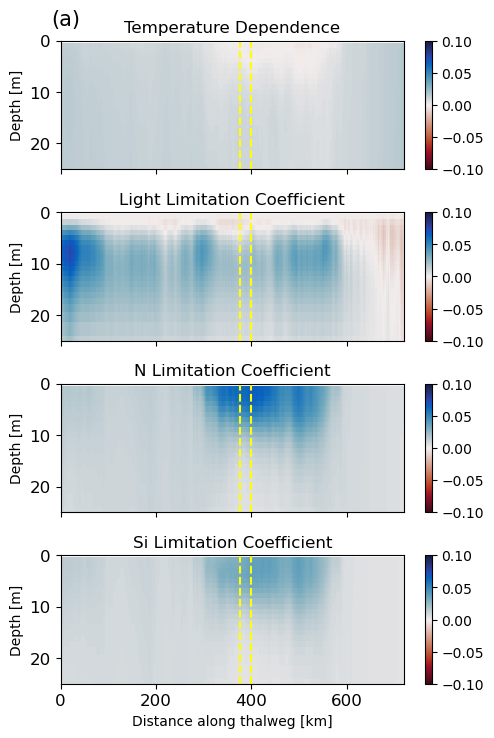

In [23]:
fig,ax=plt.subplots(4,1,figsize=(5,7))
fig.subplots_adjust(hspace=.8,wspace=.08,left=0.08,right=1.03,top=.85)
maxz=25

fig.tight_layout(pad=1)

iax=ax[0]
m=visualisations.contour_thalweg(iax,Tdep_diat_cold-Tdep_diat_clim,fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('Temperature Dependence',fontsize=12)
iax.set_xlabel('')
iax.set_ylim(maxz,0)
iax.axvline(x=375,color='yellow',linestyle='--')
iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xticklabels([])
iax.text(-20, -3, '(a)', fontsize=15,  color='k')

iax=ax[1]
m=visualisations.contour_thalweg(iax,D_cold['ILim']-D_clim['ILim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('Light Limitation Coefficient',fontsize=12)
iax.set_xlabel('')
iax.set_ylim(maxz,0)
iax.axvline(x=375,color='yellow',linestyle='--')
iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xticklabels([])



iax=ax[2]
m=visualisations.contour_thalweg(iax,D_cold['NLim']-D_clim['NLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('N Limitation Coefficient',fontsize=12)
iax.set_xlabel('')
iax.set_ylim(maxz,0)
iax.axvline(x=375,color='yellow',linestyle='--')
iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xticklabels([])



iax=ax[3]
m=visualisations.contour_thalweg(iax,D_cold['SiLim']-D_clim['SiLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('Si Limitation Coefficient',fontsize=12)
iax.set_ylim(maxz,0)
iax.axvline(x=375,color='yellow',linestyle='--')
iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
#iax.set_xticklabels([])


#iax=ax[0,1]
#m=visualisations.contour_thalweg(iax,N['ILim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
#iax.set_title('Flagellate Light Limitation Coefficient')
#iax.set_xlabel('')
#iax.set_ylim(maxz,0)

#iax=ax[1,1]
#m=visualisations.contour_thalweg(iax,N['NLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
#iax.set_title('Flagellate N Limitation Coefficient')
#iax.set_xlabel('')
#iax.set_ylim(maxz,0)

#iax=ax[2,1]
#m=visualisations.contour_thalweg(iax,N['SiLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
#iax.set_title('Flagellate Si Limitation Coefficient')
#iax.set_ylim(maxz,0)

#fig.suptitle('Cold Years',fontsize=16,y=.96)
#fig.savefig('')

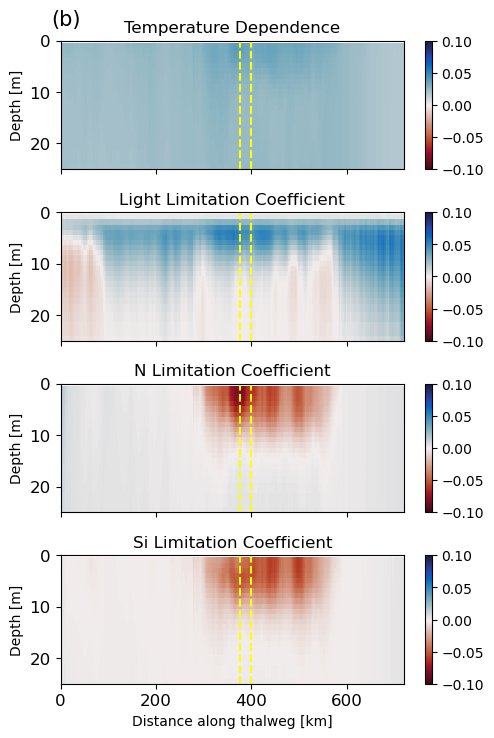

In [24]:
fig,ax=plt.subplots(4,1,figsize=(5,7))
fig.subplots_adjust(hspace=.8,wspace=.08,left=0.08,right=1.03,top=.85)
maxz=25

fig.tight_layout(pad=1)

iax=ax[0]
m=visualisations.contour_thalweg(iax,Tdep_diat_warm-Tdep_diat_clim,fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('Temperature Dependence')
iax.set_xlabel('')
iax.set_ylim(maxz,0)
iax.axvline(x=375,color='yellow',linestyle='--')
iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xticklabels([])
iax.text(-20, -3, '(b)', fontsize=15,  color='k')

iax=ax[1]
m=visualisations.contour_thalweg(iax,D_warm['ILim']-D_clim['ILim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('Light Limitation Coefficient')
iax.set_xlabel('')
iax.set_ylim(maxz,0)
iax.axvline(x=375,color='yellow',linestyle='--')
iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xticklabels([])

iax=ax[2]
m=visualisations.contour_thalweg(iax,D_warm['NLim']-D_clim['NLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('N Limitation Coefficient')
iax.set_xlabel('')
iax.set_ylim(maxz,0)
iax.axvline(x=375,color='yellow',linestyle='--')
iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xticklabels([])


iax=ax[3]
m=visualisations.contour_thalweg(iax,D_warm['SiLim']-D_clim['SiLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('Si Limitation Coefficient')
iax.set_ylim(maxz,0)
iax.axvline(x=375,color='yellow',linestyle='--')
iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
#iax.set_xticklabels([])

#iax=ax[0,1]
#m=visualisations.contour_thalweg(iax,N['ILim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
#iax.set_title('Flagellate Light Limitation Coefficient')
#iax.set_xlabel('')
#iax.set_ylim(maxz,0)

#iax=ax[1,1]
#m=visualisations.contour_thalweg(iax,N['NLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
#iax.set_title('Flagellate N Limitation Coefficient')
#iax.set_xlabel('')
#iax.set_ylim(maxz,0)

#iax=ax[2,1]
#m=visualisations.contour_thalweg(iax,N['SiLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':0,'vmax':1})
#iax.set_title('Flagellate Si Limitation Coefficient')
#iax.set_ylim(maxz,0)

#fig.suptitle('Warm Years',fontsize=18,y=1.08)
#fig.savefig('')

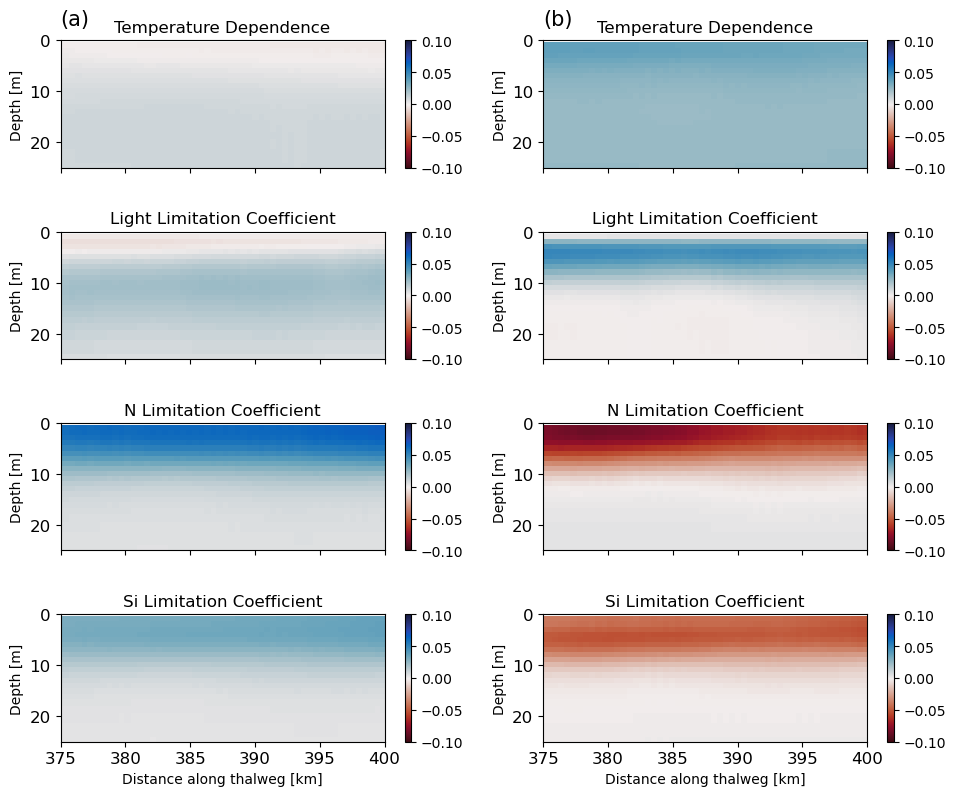

In [28]:
fig,ax=plt.subplots(4,2,figsize=(10,8))
fig.subplots_adjust(hspace=.8,wspace=.08,left=0.08,right=1.03,top=.85)
maxz=25

fig.tight_layout(pad=2.5)


### COLD YEARS
iax=ax[0,0]
m=visualisations.contour_thalweg(iax,Tdep_diat_cold-Tdep_diat_clim,fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('Temperature Dependence',fontsize=12)
iax.set_xlabel('')
iax.set_ylim(maxz,0)
#iax.axvline(x=375,color='yellow',linestyle='--')
#iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xticklabels([])
iax.set_xlim(375,400)
iax.text(375, -3, '(a)', fontsize=15,  color='k')

iax=ax[1,0]
m=visualisations.contour_thalweg(iax,D_cold['ILim']-D_clim['ILim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('Light Limitation Coefficient',fontsize=12)
iax.set_xlabel('')
iax.set_ylim(maxz,0)
#iax.axvline(x=375,color='yellow',linestyle='--')
#iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xlim(375,400)
iax.set_xticklabels([])



iax=ax[2,0]
m=visualisations.contour_thalweg(iax,D_cold['NLim']-D_clim['NLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('N Limitation Coefficient',fontsize=12)
iax.set_xlabel('')
iax.set_ylim(maxz,0)
#iax.axvline(x=375,color='yellow',linestyle='--')
#iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xlim(375,400)
iax.set_xticklabels([])



iax=ax[3,0]
m=visualisations.contour_thalweg(iax,D_cold['SiLim']-D_clim['SiLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('Si Limitation Coefficient',fontsize=12)
iax.set_ylim(maxz,0)
#iax.axvline(x=375,color='yellow',linestyle='--')
#iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xlim(375,400)
#iax.set_xticklabels([])


### WARM YEARS

iax=ax[0,1]
m=visualisations.contour_thalweg(iax,Tdep_diat_warm-Tdep_diat_clim,fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('Temperature Dependence')
iax.set_xlabel('')
iax.set_ylim(maxz,0)
#iax.axvline(x=375,color='yellow',linestyle='--')
#iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xticklabels([])
iax.set_xlim(375,400)
iax.text(375, -3, '(b)', fontsize=15,  color='k')

iax=ax[1,1]
m=visualisations.contour_thalweg(iax,D_warm['ILim']-D_clim['ILim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('Light Limitation Coefficient')
iax.set_xlabel('')
iax.set_ylim(maxz,0)
#iax.axvline(x=375,color='yellow',linestyle='--')
#iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xlim(375,400)
iax.set_xticklabels([])

iax=ax[2,1]
m=visualisations.contour_thalweg(iax,D_warm['NLim']-D_clim['NLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('N Limitation Coefficient')
iax.set_xlabel('')
iax.set_ylim(maxz,0)
#iax.axvline(x=375,color='yellow',linestyle='--')
#iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xlim(375,400)
iax.set_xticklabels([])


iax=ax[3,1]
m=visualisations.contour_thalweg(iax,D_warm['SiLim']-D_clim['SiLim'],fb,fm,method='pcolormesh',cmap=cm1,mesh_args={'vmin':-0.1,'vmax':0.1})
iax.set_title('Si Limitation Coefficient')
iax.set_ylim(maxz,0)
#iax.axvline(x=375,color='yellow',linestyle='--')
#iax.axvline(x=400,color='yellow',linestyle='--')
iax.xaxis.set_tick_params(labelsize=12)
iax.yaxis.set_tick_params(labelsize=12)
iax.set_xlim(375,400)
#iax.set_xticklabels([])

#plt.savefig('SuppFigureS5_LimitationPlots_revised.png', bbox_inches='tight',dpi=1000,transparent=False)